In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

import pandas as pd
import numpy as np

# download numpy-financial once available in conde

# Estimate future value of regular savings

In [3]:
inflation = 0.02 * 3 # mean value p.a.
rate = np.arange(0.01, 0.11, 0.01)
rate_pa = rate / 12 # p.a.
months = 12*5
seed_capital = 30000
rate_monthly = 500

benchmark = np.array([seed_capital + rate_monthly*months]*len(rate_pa)) * (1-inflation)
savings = np.fv(rate_pa, months, -rate_monthly, -seed_capital) * (1-inflation)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: numpy.fv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.fv instead (https://pypi.org/project/numpy-financial/).
  if __name__ == '__main__':


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


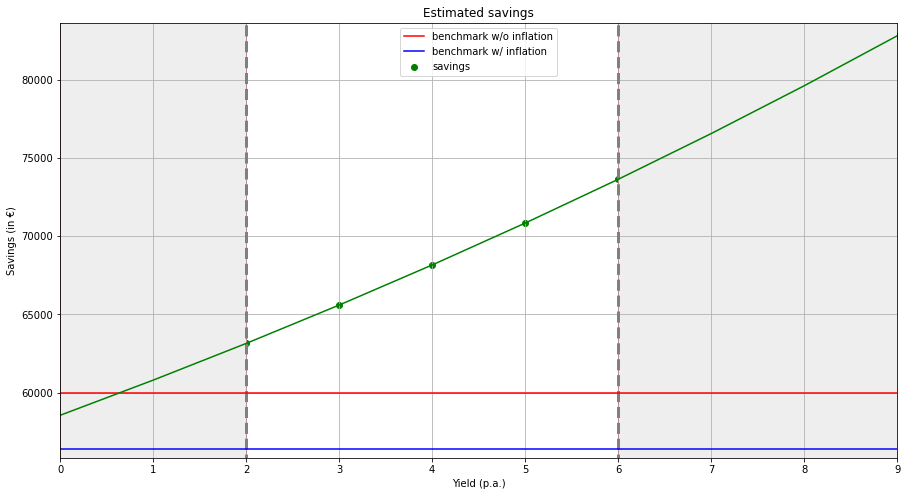

In [17]:
xaxis_len = np.arange(0,len(rate_pa))

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(np.array([2, 2]), [min(benchmark)*(0.9), max(savings)*1.1], 
         ls='--', color='gray', lw=3)
ax.plot(np.array([6, 6]), [min(benchmark)*(0.9), max(savings)*1.1], 
         ls='--', color='gray', lw=3)
rectl = Rectangle((0, 0), 2, max(savings)*2, linewidth=1, 
                 edgecolor='r', facecolor='#EEEEEE')
ax.add_patch(rectl)
rectr = Rectangle((6, 0), 10, max(savings)*2, linewidth=1, 
                 edgecolor='r', facecolor='#EEEEEE')
ax.add_patch(rectr)

ax.plot(np.array([seed_capital + rate_monthly*months]*len(rate_pa)), 
         label='benchmark w/o inflation', color='red')
ax.scatter(xaxis_len, savings, label='savings', color='green')
ax.plot(benchmark, color='blue', label='benchmark w/ inflation')
ax.plot(savings, color='green')

ax.set_ylim([min(benchmark)*0.99, max(savings)*1.01])
ax.set_xlim([0, 9])
ax.legend()
ax.grid()
ax.set_xticks(xaxis_len, ['{}%'.format(int(np.round(i, 0))) for i in rate*100])

ax.set_xlabel('Yield (p.a.)')
ax.set_ylabel('Savings (in €)')
ax.set_title('Estimated savings');

# Estimate number of load payments

In [8]:
interest_rate = 0.01/12 # p.a.
payment_per_month = -115
loan_amount = 10000
n_payments = np.nper(interest_rate, payment_per_month, loan_amount)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: numpy.nper is deprecated and will be removed from NumPy 1.20. Use numpy_financial.nper instead (https://pypi.org/project/numpy-financial/).
  after removing the cwd from sys.path.


In [9]:
n_payments / 12 # will take about 7.5 years for Bafög to be paid

7.525475997838378

# Estimate monthly rate for loan payments

In [10]:
interest_rate = 0.02 / 12 # p.a.
mortgage_amount = 250_000
n_periods = 10*12 # to be paid in 10 years
m_payment = np.pmt(interest_rate, n_periods, mortgage_amount)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: numpy.pmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pmt instead (https://pypi.org/project/numpy-financial/).
  after removing the cwd from sys.path.


In [11]:
m_payment # monthly rate

-2300.336346063969

# Estimate amount of interest in loay payments

In [12]:
periods = np.arange(10*12) + 1
interest_per_month = np.ipmt(interest_rate, periods, n_periods, mortgage_amount)
interest_per_month[:10]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: numpy.ipmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.ipmt instead (https://pypi.org/project/numpy-financial/).
  


array([-416.66666667, -413.5272172 , -410.38253532, -407.2326123 ,
       -404.07743941, -400.9170079 , -397.751309  , -394.58033394,
       -391.40407392, -388.22252014])

Text(0, 0.5, 'Monthly interest payment')

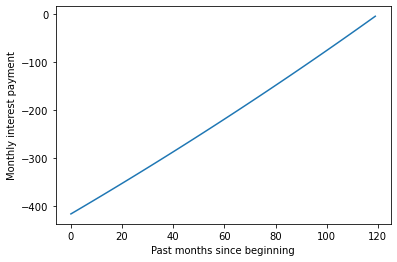

In [13]:
plt.plot(interest_per_month)
plt.xlabel('Past months since beginning')
plt.ylabel('Monthly interest payment')

# Estimate amount payment against loan

In [14]:
principal_per_month = np.ppmt(interest_rate, periods, n_periods, mortgage_amount)
principal_per_month[0:10]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: numpy.ppmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.ppmt instead (https://pypi.org/project/numpy-financial/).
  """Entry point for launching an IPython kernel.


array([-1883.6696794 , -1886.80912886, -1889.95381074, -1893.10373376,
       -1896.25890665, -1899.41933816, -1902.58503706, -1905.75601212,
       -1908.93227214, -1912.11382593])

Text(0, 0.5, 'Payment Monthly')

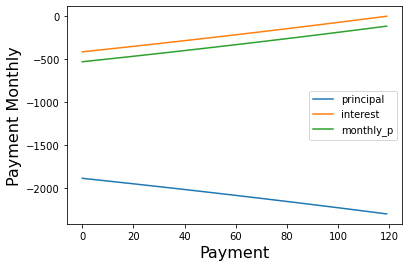

In [15]:
mortgage_df = pd.DataFrame({"principal": principal_per_month,
                           "interest": interest_per_month,
                           "monthly_p": interest_per_month + payment_per_month})
mortgage_df.plot()
plt.xlabel("Payment", size=16)
plt.ylabel("Payment Monthly", size=16)